In [1]:
import pandas as pd # to read CSV files (Comma Separated Values)

train_x = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/train.x.csv')
train_x.head()

,Id,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att18,att19,att20,att21,att22,att23,att24,att25,att26,msd_track_id
0,1,41.08,6.579,4.307,3.421,3.192,2.076,2.179,2.052,1.794,...,1.3470,-0.2463,-1.5470,0.17920,-1.1530,-0.7370,0.40750,-0.67190,-0.05147,TRPLTEM128F92E1389
1,2,60.80,5.973,4.344,3.261,2.835,2.725,2.446,1.884,1.962,...,-0.3316,0.3519,-1.4760,0.52700,-2.1960,1.5990,-1.39000,0.22560,-0.72080,TRJWMBQ128F424155E
2,3,51.47,4.971,4.316,2.916,3.112,2.290,2.053,1.934,1.878,...,-0.2803,-0.1603,-0.1355,1.03500,0.2370,1.4890,0.02959,-0.13670,0.10820,TRRZWMO12903CCFCC2
3,4,41.28,6.610,4.411,2.602,2.822,2.126,1.984,1.973,1.945,...,-1.6930,1.0040,-0.3953,0.26710,-1.0450,0.4974,0.03724,1.04500,-0.20000,TRBZRUT12903CE6C04
4,5,54.17,8.945,4.685,4.208,3.154,3.527,2.733,2.202,2.686,...,2.4690,-0.5449,-0.5622,-0.08968,-0.9823,-0.2445,-1.65800,-0.04825,-0.70950,TRLUJQF128F42AF5BF


In [2]:
train_y = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/train.y.csv')
train_y.head()

,Id,class_label
0,1,International
1,2,Vocal
2,3,Latin
3,4,Blues
4,5,Vocal


In [3]:
test_x = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/test.x.csv')
test_x.head()

,Id,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26
0,1,38.22,8.076,6.935,4.696,3.856,3.465,2.922,2.568,2.070,...,3.988,0.4957,0.1836,-2.2210,0.6453,-0.2923,1.2000,-0.09179,0.4674,0.2158
1,2,36.42,6.131,5.364,4.292,3.968,2.937,2.872,2.142,2.050,...,7.098,1.2290,0.5971,-1.0670,0.9569,-1.8240,2.3130,-0.80890,0.5612,-0.6225
2,3,70.01,5.496,4.698,3.699,3.258,2.293,2.680,2.226,2.034,...,4.449,0.4773,1.6370,-1.0690,2.4160,-0.6299,1.4190,-0.81960,0.9151,-0.5948
3,4,40.64,7.281,6.702,4.043,3.729,3.043,2.644,2.366,1.940,...,2.785,1.9000,-1.1370,1.2750,1.7920,-2.1250,1.6090,-0.83230,-0.1998,-0.1218
4,5,38.85,7.118,5.703,4.825,4.088,3.823,3.254,2.551,2.193,...,4.536,2.1470,1.0200,-0.2656,2.8050,0.2762,0.2504,1.04900,0.3447,-0.7689


In [4]:
test_y_sample = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/submission-random.csv')
test_y_sample.head()

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal
0,1,0.0964,0.0884,0.0121,0.1004,0.0137,0.1214,0.0883,0.0765,0.0332,0.0445,0.1193,0.1019,0.1038
1,2,0.0121,0.0804,0.0376,0.0289,0.1310,0.0684,0.1044,0.0118,0.1562,0.0585,0.1633,0.1400,0.0073
2,3,0.1291,0.0985,0.0691,0.0356,0.0788,0.0529,0.1185,0.1057,0.1041,0.0075,0.0481,0.1283,0.0238
3,4,0.0453,0.1234,0.0931,0.0126,0.1224,0.0627,0.0269,0.0764,0.0812,0.1337,0.0357,0.0937,0.0930
4,5,0.0600,0.0915,0.0667,0.0947,0.0509,0.0335,0.1251,0.0202,0.1012,0.0365,0.1310,0.0898,0.0991


In [5]:
test_y_sample[:0]

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal


In [6]:
import numpy as np

train_X = np.array(train_x)
train_Y = np.array(train_y[:]['class_label'])
test_X = np.array(test_x)

# Getting rid of the first and the last column: Id and msd_track_id
X_train_val = np.array(train_X[:, 1:-1], dtype=float)
X_test = np.array(test_X[:, 1:], dtype=float)

train_Y.shape

(13000,)

In [7]:
from collections import Counter

# Count the freq of the keys in the training labels
counted_labels = Counter(train_Y)
labels_keys = counted_labels.keys()
labels_keys

dict_keys(['Electronic', 'Country', 'New_Age', 'Pop_Rock', 'Jazz', 'Blues', 'Rap', 'RnB', 'International', 'Reggae', 'Vocal', 'Latin', 'Folk'])

In [8]:
labels_keys_sorted = sorted(labels_keys)
labels_keys_sorted

['Blues',
 'Country',
 'Electronic',
 'Folk',
 'International',
 'Jazz',
 'Latin',
 'New_Age',
 'Pop_Rock',
 'Rap',
 'Reggae',
 'RnB',
 'Vocal']

In [9]:
# This for loop for creating a dictionary/ vocab
key_to_val = {key: val for val, key in enumerate(labels_keys_sorted)}
key_to_val['Country']
key_to_val

{'Blues': 0,
 'Country': 1,
 'Electronic': 2,
 'Folk': 3,
 'International': 4,
 'Jazz': 5,
 'Latin': 6,
 'New_Age': 7,
 'Pop_Rock': 8,
 'Rap': 9,
 'Reggae': 10,
 'RnB': 11,
 'Vocal': 12}

In [10]:
val_to_key = {val: key for val, key in enumerate(labels_keys_sorted)}
val_to_key[1]
val_to_key

{0: 'Blues',
 1: 'Country',
 2: 'Electronic',
 3: 'Folk',
 4: 'International',
 5: 'Jazz',
 6: 'Latin',
 7: 'New_Age',
 8: 'Pop_Rock',
 9: 'Rap',
 10: 'Reggae',
 11: 'RnB',
 12: 'Vocal'}

In [11]:
Y_train_vec = []
for each in train_y[:]['class_label']:
#     print(each, key_to_val[each])
    Y_train_vec.append(key_to_val[each])

Y_train_val = np.array(Y_train_vec)
Y_train_val.shape

(13000,)

In [12]:
# # Pre-processing: normalizing
# def normalize(X):
#     # max scale for images 255= 2**8= 8 bit grayscale for each channel
#     return (X - X.mean(axis=0)) #/ X.std(axis=0)
# X_train, X_val, X_test = normalize(X=X_train), normalize(X=X_val), normalize(X=X_test)

# Preprocessing: normalizing the data based on the training set
mean = X_train_val.mean(axis=0)
std = X_train_val.std(axis=0)

X_train_val, X_test = (X_train_val - mean)/ std, (X_test - mean)/ std
X_train_val.shape, X_test.shape, X_train_val.dtype, X_test.dtype

((13000, 26), (10400, 26), dtype('float64'), dtype('float64'))

In [13]:
# Creating validation set: 10% or 1/10 of the training set or whatever dataset with labels/ annotation
valid_size = X_train_val.shape[0]//10
valid_size
X_val = X_train_val[-valid_size:]
Y_val = Y_train_val[-valid_size:]
X_train = X_train_val[: -valid_size]
Y_train = Y_train_val[: -valid_size]
X_train_val.shape, 
X_train.shape, X_val.shape, X_test.shape, Y_val.shape, Y_train.shape 
# X_train.dtype, X_val.dtype
# Y_train.dtype, Y_val

((11700, 26), (1300, 26), (10400, 26), (1300,), (11700,))

In [18]:
# Model
import impl.layer as l # or from impl.layer import *
from impl.loss import * # import all functions from impl.loss file # import impl.loss as loss_func
from sklearn.utils import shuffle as skshuffle

class FFNN:

    def __init__(self, D, C, H, L):
        self.L = L # number of layers or depth
        self.losses = {'train':[], 'train_acc':[], 'valid':[], 'valid_acc':[]}
        
        # The adaptive/learnable/updatable random feedforward
        self.model = []
        self.grads = []
        low, high = -1, 1
        
        # Input layer: weights/ biases
        m = dict(W=np.random.uniform(size=(D, H), low=low, high=high) / np.sqrt(D / 2.), 
                 b=np.zeros((1, H)))
        self.model.append(m)
        # Input layer: gradients
        self.grads.append({key: np.zeros_like(val) for key, val in self.model[0].items()})

        # Hidden layers: weights/ biases
        m_L = []
        for _ in range(L):
            m = dict(W=np.random.uniform(size=(H, H), low=low, high=high) / np.sqrt(H / 2.), 
                     b=np.zeros((1, H)))
            m_L.append(m)
        self.model.append(m_L)
        # Hidden layer: gradients
        grad_L = []
        for _ in range(L):
            grad_L.append({key: np.zeros_like(val) for key, val in self.model[1][0].items()})
        self.grads.append(grad_L)
        
        # Output layer: weights/ biases
        m = dict(W=np.random.uniform(size=(H, C), low=low, high=high) / np.sqrt(H / 2.), 
                 b=np.zeros((1, C)))
        self.model.append(m)
        # Outout layer: gradients
        self.grads.append({key: np.zeros_like(val) for key, val in self.model[2].items()})
        
    def fc_forward(self, X, W, b):
        out = (X @ W) + b
        cache = (W, X)
        return out, cache

    def fc_backward(self, dout, cache):
        W, X = cache

        dW = X.T @ dout
        db = np.sum(dout, axis=0).reshape(1, -1) # db_1xn
        dX = dout @ W.T # Backprop

        return dX, dW, db

    def train_forward(self, X, train):
        caches, ys = [], []
        
        # Input layer
        y, fc_cache = self.fc_forward(X=X, W=self.model[0]['W'], b=self.model[0]['b']) # X_1xD, y_1xc
#         y, nl_cache = l.tanh_forward(X=y)
#         y, nl_cache = l.relu_forward(X=y)
        y, nl_cache = l.selu_forward(X=y)
        X = y.copy() # pass to the next layer
        if train:
            caches.append((fc_cache, nl_cache))
        
        # Hidden layers
        fc_caches, nl_caches = [], []
        for layer in range(self.L):
            y, fc_cache = self.fc_forward(X=X, W=self.model[1][layer]['W'], b=self.model[1][layer]['b'])
#             y, nl_cache = l.tanh_forward(X=y)
#             y, nl_cache = l.relu_forward(X=y)
            y, nl_cache = l.selu_forward(X=y)
            X = y.copy() # pass to next layer
            if train:
                fc_caches.append(fc_cache)
                nl_caches.append(nl_cache)
        if train:
            caches.append((fc_caches, nl_caches)) # caches[1]            
        
        # Output layer
        y, fc_cache = self.fc_forward(X=X, W=self.model[2]['W'], b=self.model[2]['b'])
        # Softmax is included in loss function
        if train:
            caches.append(fc_cache)

        return y, caches # for backpropating the error

    def loss_function(self, y, y_train):
        
        loss = cross_entropy(y, y_train) # softmax is included
        dy = dcross_entropy(y, y_train) # dsoftmax is included
        
        return loss, dy
        
    def train_backward(self, dy, caches):
        grads = self.grads # initialized by Zero in every iteration/epoch
        
        # Output layer
        fc_cache = caches[2]
        # dSoftmax is included in loss function
        dX, dW, db = self.fc_backward(dout=dy, cache=fc_cache)
        dy = dX.copy()
        grads[2]['W'] = dW
        grads[2]['b'] = db

        # Hidden layer
        fc_caches, nl_caches = caches[1]
        for layer in reversed(range(self.L)):
#             dy = l.tanh_backward(cache=nl_caches[layer], dout=dy) # diffable function
#             dy = l.relu_backward(cache=nl_caches[layer], dout=dy) # diffable function
            dy = l.selu_backward(cache=nl_caches[layer], dout=dy) # diffable function
            dX, dW, db = self.fc_backward(dout=dy, cache=fc_caches[layer])
            dy = dX.copy()
            grads[1][layer]['W'] = dW
            grads[1][layer]['b'] = db
        
        # Input layer
        fc_cache, nl_cache = caches[0]
#         dy = l.tanh_backward(cache=nl_cache, dout=dy) # diffable function
#         dy = l.relu_backward(cache=nl_cache, dout=dy) # diffable function
        dy = l.selu_backward(cache=nl_cache, dout=dy) # diffable function
        dX, dW, db = self.fc_backward(dout=dy, cache=fc_cache)
        grads[0]['W'] = dW
        grads[0]['b'] = db

        return dX, grads
    
    def test(self, X):
        y_logit, _ = self.train_forward(X, train=False)
        
        # if self.mode == 'classification':
        y_prob = l.softmax(y_logit) # for accuracy == acc
        y_pred = np.argmax(y_prob, axis=1) # for loss ==err
        
        return y_pred, y_logit
        
    def get_minibatch(self, X, y, minibatch_size, shuffle):
        minibatches = []

        if shuffle:
            X, y = skshuffle(X, y)

        for i in range(0, X.shape[0], minibatch_size):
            X_mini = X[i:i + minibatch_size]
            y_mini = y[i:i + minibatch_size]
            minibatches.append((X_mini, y_mini))

        return minibatches

    def sgd(self, train_set, val_set, alpha, mb_size, n_iter, print_after):
        X_train, y_train = train_set
        X_val, y_val = val_set

        # Epochs
        for iter in range(1, n_iter + 1):

            # Minibatches
            minibatches = self.get_minibatch(X_train, y_train, mb_size, shuffle=True)
            idx = np.random.randint(0, len(minibatches))
            X_mini, y_mini = minibatches[idx]
            
            # Train the model
            y, caches = self.train_forward(X_mini, train=True)
            _, dy = self.loss_function(y, y_mini)
            _, grads = self.train_backward(dy, caches) 
            
            # Update the model for input layer
            for key in grads[0].keys():
                self.model[0][key] -= alpha * grads[0][key]

            # Update the model for the hidden layers
            for layer in range(self.L):
                for key in grads[1][layer].keys():
                    self.model[1][layer][key] -= alpha * grads[1][layer][key]

            # Update the model for output layer
            for key in grads[2].keys():
                self.model[2][key] -= alpha * grads[2][key]
                
            # Trained model info
            y_pred, y_logit = self.test(X_mini)
            loss, _ = self.loss_function(y_logit, y_mini) # softmax is included in entropy loss function
            self.losses['train'].append(loss)
            acc = np.mean(y_pred == y_mini) # confusion matrix
            self.losses['train_acc'].append(acc)

            # Validated model info
            y_pred, y_logit = self.test(X_val)
            valid_loss, _ = self.loss_function(y_logit, y_val) # softmax is included in entropy loss function
            self.losses['valid'].append(valid_loss)
            valid_acc = np.mean(y_pred == y_val) # confusion matrix
            self.losses['valid_acc'].append(valid_acc)
            
            # Print the model info: loss & accuracy or err & acc
            if iter % print_after == 0:
                print('Iter: {}, train loss: {:.4f}, train acc: {:.4f}, valid loss: {:.4f}, valid acc: {:.4f}'.format(
                    iter, loss, acc, valid_loss, valid_acc))

#         # Test the final model
#         y_pred, y_logit = nn.test(X_test)
#         loss, _ = self.loss_function(y_logit, y_test) # softmax is included in entropy loss function
#         acc = np.mean(y_pred == y_test)
#         print('Last iteration - Test accuracy mean: {:.4f}, std: {:.4f}, loss: {:.4f}'.format(
#             acc.mean(), acc.std(), loss))

In [19]:
Y_train.shape, X_train.shape, X_val.shape, Y_val.shape

((11700,), (11700, 26), (1300, 26), (1300,))

In [20]:
# Hyper-parameters
n_iter = 1 # number of epochs
alpha = 1e-2 # learning_rate
mb_size = 64 # 2**10==1024 # width, timestep for sequential data or minibatch size
print_after = 1 # n_iter//10 # print loss for train, valid, and test
num_hidden_units = 32 # number of kernels/ filters in each layer
num_input_units = X_train.shape[1] # noise added at the input lavel as input noise we can use dX or for more improvement
num_output_units = Y_train.max() + 1 # number of classes in this classification problem
# num_output_units = Y_train.shape[1] # number of classes in this classification problem
num_layers = 3 # depth 

# Build the model/NN and learn it: running session.
nn = FFNN(C=num_output_units, D=num_input_units, H=num_hidden_units, L=num_layers)

nn.sgd(train_set=(X_train, Y_train), val_set=(X_val, Y_val), mb_size=mb_size, alpha=alpha, 
           n_iter=n_iter, print_after=print_after)

Iter: 1, train loss: 2.7153, train acc: 0.0781, valid loss: 2.6393, valid acc: 0.0938


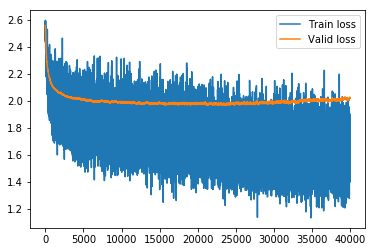

In [129]:
# # Display the learning curve and losses for training, validation, and testing
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.plot(nn.losses['train'], label='Train loss')
plt.plot(nn.losses['valid'], label='Valid loss')
plt.legend()
plt.show()

In [130]:
loss_train = np.array(nn.losses['train'], dtype=float)
loss_valid = np.array(nn.losses['valid'], dtype=float)
loss_train.shape, loss_valid.shape

((40000,), (40000,))

In [131]:
loss_train_norm = (loss_train - loss_train.mean(axis=0))/ loss_train.std(axis=0)
loss_valid_norm = (loss_valid - loss_valid.mean(axis=0))/ loss_valid.std(axis=0)

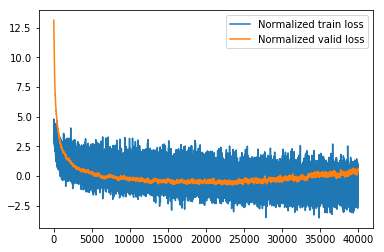

In [132]:
plt.plot(loss_train_norm, label='Normalized train loss')
plt.plot(loss_valid_norm, label='Normalized valid loss')
plt.legend()
plt.show()

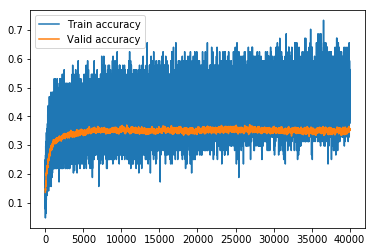

In [133]:
plt.plot(nn.losses['train_acc'], label='Train accuracy')
plt.plot(nn.losses['valid_acc'], label='Valid accuracy')
plt.legend()
plt.show()

In [134]:
heading = labels_keys_sorted.copy()
heading.insert(0, 'Id')
heading

['Id',
 'Blues',
 'Country',
 'Electronic',
 'Folk',
 'International',
 'Jazz',
 'Latin',
 'New_Age',
 'Pop_Rock',
 'Rap',
 'Reggae',
 'RnB',
 'Vocal']

In [135]:
y_pred, y_logits = nn.test(X_test)
y_prob = l.softmax(y_logits)
y_prob.shape, X_test.shape, y_logits.shape, test_y_sample.shape, test_y_sample[:1]

((10400, 13),
 (10400, 26),
 (10400, 13),
 (10400, 14),
    Id   Blues  Country  Electronic    Folk  International    Jazz   Latin  \
 0   1  0.0964   0.0884      0.0121  0.1004         0.0137  0.1214  0.0883   
 
    New_Age  Pop_Rock     Rap  Reggae     RnB   Vocal  
 0   0.0765    0.0332  0.0445  0.1193  0.1019  0.1038  )

In [136]:
pred_list = []
for Id, pred in enumerate(y_prob):
#     print(Id+1, *pred)
    pred_list.append([Id+1, *pred])

In [137]:
pred_file = open(file='prediction.csv', mode='w')
pred_file.write('\n') # because of the previous line        

for idx in range(len(heading)):
    if idx < len(heading) - 1:
        pred_file.write(heading[idx] + ',')
    else:
        pred_file.write(heading[idx] + '\n')        

# len(test), test[0]
# for key in test:
for i in range(len(pred_list)): # rows
    for j in range(len(pred_list[i])): # cols
        if j < (len(pred_list[i]) - 1):
            pred_file.write(str(pred_list[i][j]))
            pred_file.write(',')
        else: # last item before starting a new line
            pred_file.write(str(pred_list[i][j]) + '\n')        

# pred_file.write(-',')
pred_file.close()

In [138]:
pd.read_csv(filepath_or_buffer='prediction.csv').head()

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal
0,1,0.011127,0.001657,0.043420,0.006671,0.026745,0.008000,0.030849,0.009616,0.029503,0.549832,0.256633,0.024783,0.001164
1,2,0.022959,0.005619,0.004510,0.012114,0.045362,0.002255,0.149483,0.004088,0.013180,0.023608,0.701528,0.010052,0.005243
2,3,0.002641,0.000382,0.012603,0.000432,0.008514,0.001073,0.008664,0.000946,0.012914,0.090726,0.786648,0.073943,0.000513
3,4,0.098085,0.109661,0.031380,0.157419,0.073390,0.053881,0.046042,0.017794,0.060610,0.008261,0.210884,0.049489,0.083105
4,5,0.010988,0.000189,0.011467,0.000455,0.008909,0.000288,0.007197,0.003143,0.006634,0.531755,0.416846,0.002100,0.000028


In [139]:
pd.read_csv(filepath_or_buffer='prediction.csv').shape, test_y_sample.shape

((10400, 14), (10400, 14))

In [140]:
test_y_sample.head()

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal
0,1,0.0964,0.0884,0.0121,0.1004,0.0137,0.1214,0.0883,0.0765,0.0332,0.0445,0.1193,0.1019,0.1038
1,2,0.0121,0.0804,0.0376,0.0289,0.1310,0.0684,0.1044,0.0118,0.1562,0.0585,0.1633,0.1400,0.0073
2,3,0.1291,0.0985,0.0691,0.0356,0.0788,0.0529,0.1185,0.1057,0.1041,0.0075,0.0481,0.1283,0.0238
3,4,0.0453,0.1234,0.0931,0.0126,0.1224,0.0627,0.0269,0.0764,0.0812,0.1337,0.0357,0.0937,0.0930
4,5,0.0600,0.0915,0.0667,0.0947,0.0509,0.0335,0.1251,0.0202,0.1012,0.0365,0.1310,0.0898,0.0991
